### *Training notebook for metrics extraction  -> check __metrics_analysis.ipynb__ for something more clear*

In [3]:
# general imports
import numpy as np
import pandas as pd
from os import path
#from PIL import Image
from datetime import datetime

# functions
from hach.cleaning import *
from hach.metrics import *
from hach.plot_metrics import *

# plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the climate dataframes pickles for each year into a dictionary**

In [2]:
climate_dfs = {}
for i in range(2017, 2021):
    climate_dfs[i] = pd.read_pickle('data/climate_df_{}.pkl'.format(i))

In [3]:
# full climate df
full_climate_df = pd.DataFrame(columns = climate_dfs[2017].columns)
for y in range(2017, 2021):
    full_climate_df = full_climate_df.append(climate_dfs[y])

### Wiki data

In [3]:
# load the labels for wiki data
wiki_labels = pd.read_csv('data/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

**Cleaning dataset**

In [4]:
full_climate_df = clean_df(full_climate_df)

NameError: name 'full_climate_df' is not defined

### *Run only once - for wiki speakers*

In [13]:
wiki_speakers = pd.DataFrame(columns=wiki_data.columns)
speakers_ids = full_climate_df.qids.apply(lambda x: x[0]).unique().tolist()

wiki_data = wiki_data.set_index(wiki_data.id)


NameError: name 'wiki_data' is not defined

In [52]:
# DO ONCE
%%time
from tqdm import tqdm

for i in tqdm(speakers_ids):
    if i in wiki_data.index:
        wiki_speakers = wiki_speakers.append(wiki_data.loc[i])

100%|██████████| 46792/46792 [09:12<00:00, 84.76it/s] 

CPU times: user 9min 11s, sys: 2.05 s, total: 9min 13s
Wall time: 9min 12s


In [53]:
#DO ONCE
# pickle pickle pickle
wiki_speakers.to_pickle('data/wiki_speakers.pkl')

### *End of pickling*

### Load the wiki speakers pickle

In [3]:
wiki_speakers = pd.read_pickle('data/wiki_speakers.pkl')

In [4]:
wiki_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
Q23762578,None,[+1947-12-20T00:00:00Z],"[Q902, Q843]",[Q6581097],1319692653,None,None,[Q82955],[Q1361491],None,Q23762578,Anisul Islam Mahmud,None,item,[Q432]
Q18199405,None,[+1963-08-13T00:00:00Z],[Q34],[Q6581097],1280534852,None,None,[Q1281618],None,None,Q18199405,Anders Jansson,None,item,None
Q5415483,None,[+1981-11-01T00:00:00Z],[Q30],[Q6581097],1378227353,None,None,"[Q19204627, Q15295720]",None,None,Q5415483,Evan Mathis,None,item,None
Q4911497,"[Warren Wilhelm, Jr., Bill deBlasio, Warren Wi...",[+1961-05-08T00:00:00Z],[Q30],[Q6581097],1393528151,None,None,"[Q82955, Q40348]",[Q29552],None,Q4911497,Bill de Blasio,None,item,None
Q3061333,[Evan Lee Scribner],[+1985-07-19T00:00:00Z],[Q30],[Q6581097],1377322587,None,None,[Q10871364],None,None,Q3061333,Evan Scribner,None,item,None


**Cleaning**

In [5]:
wiki_speakers = wiki_speakers.drop_duplicates('id')


In [6]:
# cleaning
for i in range(2017, 2021):
    climate_dfs[i] = clean_df(climate_dfs[i])
     #drop_indices = climate_dfs[i][['speaker', 'qids']].apply(lambda x: if x.qids[0] not in wiki_speakers.index )

**Top speakers barplots**

In [7]:
# show top speakers from 2017 to 2020
top_speakers_2017 = top_speakers(climate_dfs[2017], 10)
top_speakers_2018 = top_speakers(climate_dfs[2018], 10)
top_speakers_2019 = top_speakers(climate_dfs[2019], 10)
top_speakers_2020 = top_speakers(climate_dfs[2020], 10)

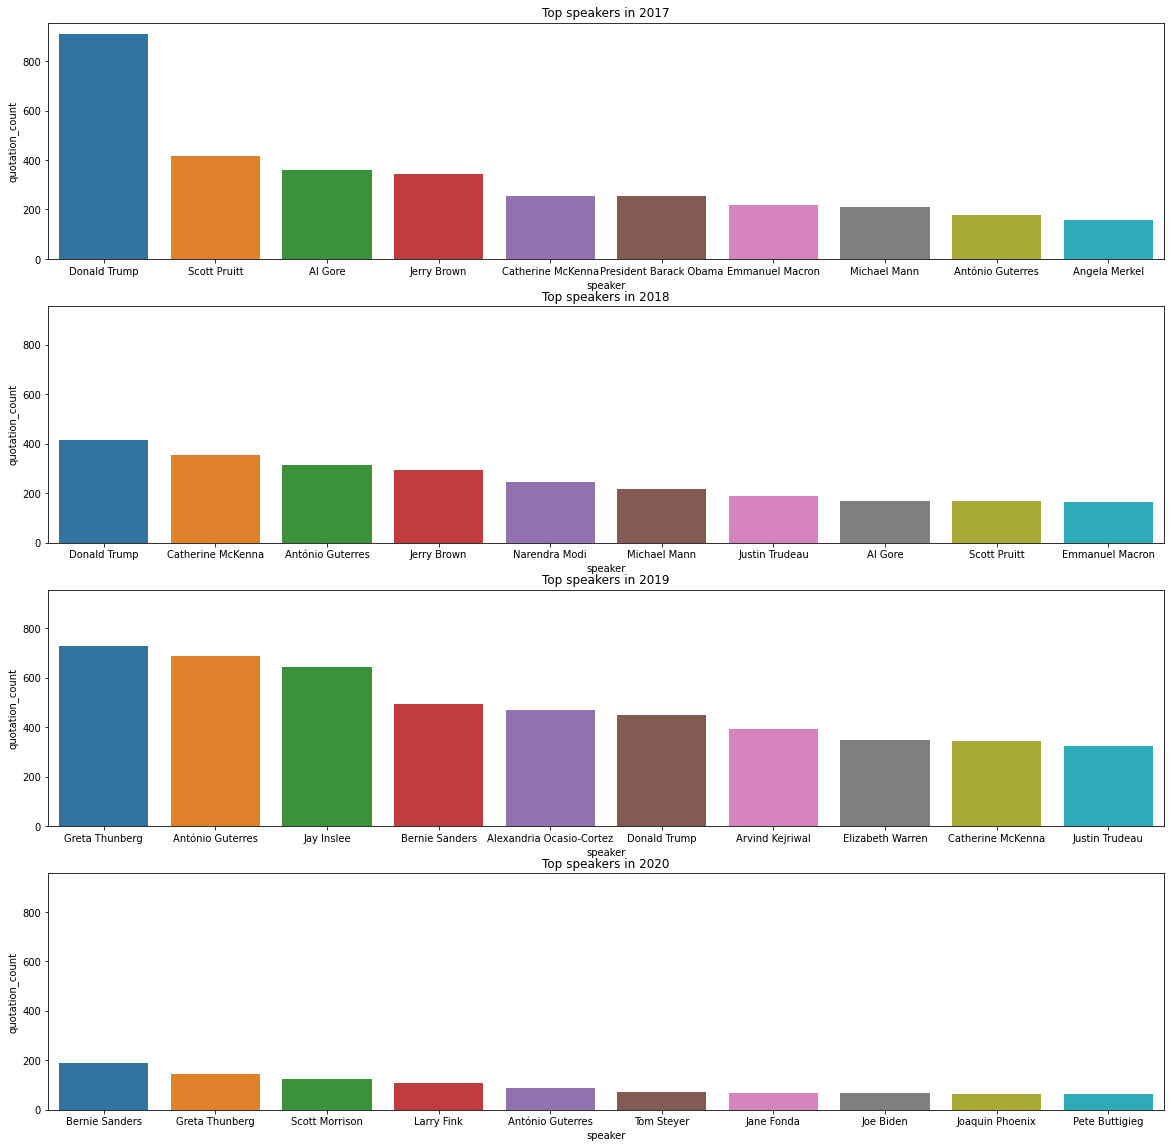

In [8]:
fig, ax = plt.subplots(4, figsize=(20,20), sharey=True)

ax[0].set_title('Top speakers in 2017')
ax[1].set_title('Top speakers in 2018')
ax[2].set_title('Top speakers in 2019')
ax[3].set_title('Top speakers in 2020')

sns.barplot(ax = ax[0], x=top_speakers_2017.speaker, y=top_speakers_2017.quotation_count)
sns.barplot(ax = ax[1], x=top_speakers_2018.speaker, y=top_speakers_2018.quotation_count)
sns.barplot(ax = ax[2], x=top_speakers_2019.speaker, y=top_speakers_2019.quotation_count)
sns.barplot(ax = ax[3], x=top_speakers_2020.speaker, y=top_speakers_2020.quotation_count)

plt.show()

In [9]:
# show top quotations from 2017
top_quotations(climate_dfs[2017], 10)

,speaker,quotation,numOccurrences
0,Jason Kessler,This is about an anti-white climate within the...,1579
1,Elon Musk,Climate change is real. Leaving Paris is not g...,1157
2,António Guterres,Climate change is undeniable. Climate Change i...,1017
3,Paolo Gentiloni,a cornerstone in the co-operation between our ...,843
4,Donald Trump,could use a little bit of that good old #Globa...,833
5,Angela Merkel,will combine our forces more resolutely than e...,762
6,Mario Rodriguez,The battle against climate change is irreversi...,717
7,Donald Trump,Perhaps we could use a little bit of that good...,677
8,Donald Trump,"In the East, it could be the COLDEST New Year'...",654
9,Cara Mund,There is evidence that climate change is exist...,596


### Metrics of speakers

In [11]:
# RUN ONLY ONCE
%%time
from tqdm import tqdm

for i in tqdm(range(2017, 2021)):
    speakers_df = get_attributes(climate_dfs[i], wiki_speakers, wiki_labels)
    speakers_df.to_pickle('data/speakers_{}.pkl'.format(i))

100%|██████████| 4/4 [18:02<00:00, 270.67s/it]

CPU times: user 18min 2s, sys: 236 ms, total: 18min 2s
Wall time: 18min 2s


### Load the speakers pickles

In [2]:
speakers = {}
for i in range(2017, 2021):
    speakers[i] = pd.read_pickle('data/speakers_{}.pkl'.format(i))

NameError: name 'pd' is not defined

In [11]:
speakers[2018]

,speaker,quotation_count,gender,age,nationality,political_party,occupation
0,Donald Trump,415,male,75.0,United States of America,Republican Party,business magnate
1,Catherine McKenna,356,female,50.0,Canada,Liberal Party of Canada,lawyer
2,António Guterres,314,male,72.0,Portugal,Socialist Party,politician
3,Jerry Brown,293,male,83.0,United States of America,Democratic Party,lawyer
4,Narendra Modi,243,male,71.0,India,Bharatiya Janata Party,politician
...,...,...,...,...,...,...,...
18351,Jeff Ward,1,male,35.0,United States of America,None,actor
18352,Jeff Williams,1,male,71.0,United States of America,None,drummer
18353,Jeff Wilson,1,male,48.0,United States of America,None,scientist
18354,Jeff Wood,1,male,67.0,United Kingdom,None,association football player


**Gender**

Lets see the proportion of men and women talking about climate between 2017 and 2020

In [1]:
# counts 2017
nb_men_2017 = speakers[2017][speakers[2017].gender == 'male'].speaker.count()
nb_women_2017 = speakers[2017][speakers[2017].gender == 'female'].speaker.count()
# counts 2018
nb_men_2018 = speakers[2018][speakers[2018].gender == 'male'].speaker.count()
nb_women_2018 = speakers[2018][speakers[2018].gender == 'female'].speaker.count()
# counts 2019
nb_men_2019 = speakers[2019][speakers[2019].gender == 'male'].speaker.count()
nb_women_2019 = speakers[2019][speakers[2019].gender == 'female'].speaker.count()
# counts 2020
nb_men_2020 = speakers[2020][speakers[2020].gender == 'male'].speaker.count()
nb_women_2020 = speakers[2020][speakers[2020].gender == 'female'].speaker.count()

# plot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14,6))

ax1.set_title('Gender of speakers 2017')
ax2.set_title('Gender of speakers 2018')
ax3.set_title('Gender of speakers 2019')
ax4.set_title('Gender of speakers 2020')

ax1.pie([nb_men_2017, nb_women_2017], labels=['men', 'women'], autopct='%1.0f%%')
ax2.pie([nb_men_2018, nb_women_2018], labels=['men', 'women'], autopct='%1.0f%%')
ax3.pie([nb_men_2019, nb_women_2019], labels=['men', 'women'], autopct='%1.0f%%')
ax4.pie([nb_men_2020, nb_women_2020], labels=['men', 'women'], autopct='%1.0f%%')

plt.show()

NameError: name 'speakers' is not defined

**Age**

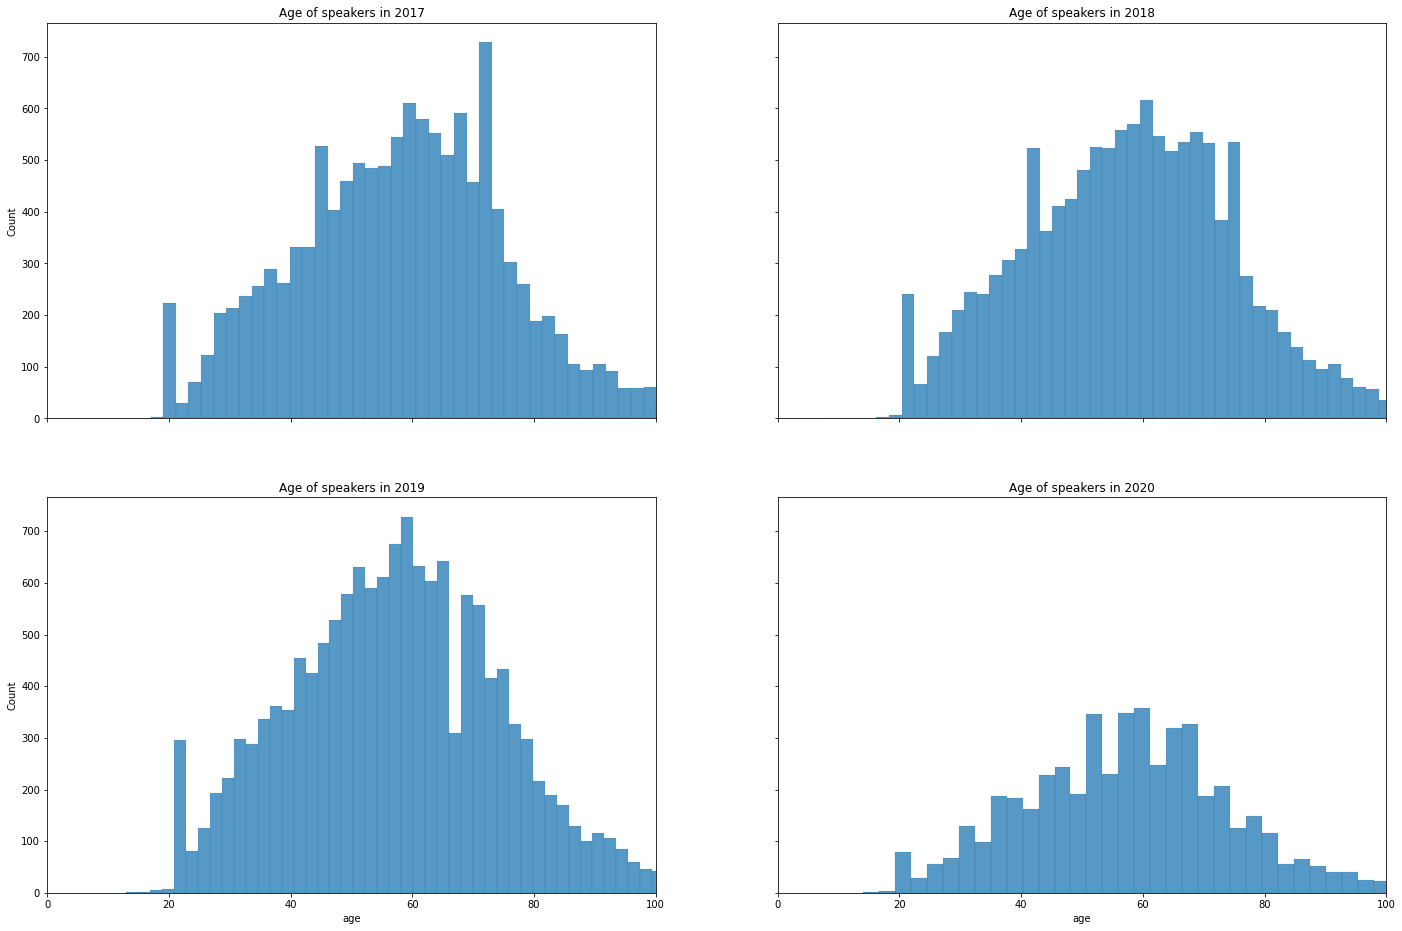

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(24,16), sharex=True, sharey=True)

axs[0][0].set_title('Age of speakers in 2017')
axs[0][1].set_title('Age of speakers in 2018')
axs[1][0].set_title('Age of speakers in 2019')
axs[1][1].set_title('Age of speakers in 2020')

sns.histplot(speakers[2017]['age'], ax = axs[0][0])
sns.histplot(speakers[2018]['age'], ax = axs[0][1])
sns.histplot(speakers[2019]['age'], ax = axs[1][0])
sns.histplot(speakers[2020]['age'], ax = axs[1][1])

# @TODO: correct the age by checking the death date
plt.xlim((0, 100))
plt.show()


**Nationality**

In [14]:
nationality_count(speakers[2017])

,speaker
United States of America,5204
United Kingdom,1754
Canada,728
Australia,653
India,389
Others,2843


Plot pie charts

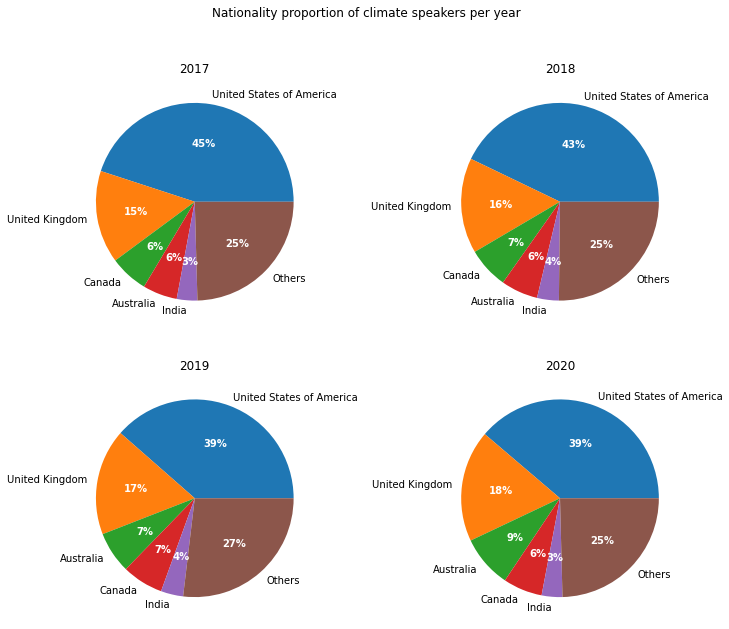

In [15]:
plot_nationality_charts(speakers)

**Political party**

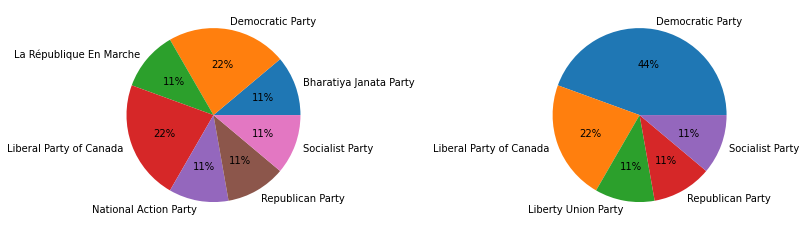

In [36]:
party_count_2018 = speakers_2018.groupby('political_party').speaker.count().to_frame()
party_count_2019 = speakers_2019.groupby('political_party').speaker.count().to_frame()

# plot pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

ax1.pie(party_count_2018.speaker.tolist(), labels = party_count_2018.index.tolist(), autopct='%1.0f%%')
ax2.pie(party_count_2019.speaker.tolist(), labels = party_count_2019.index.tolist(), autopct='%1.0f%%')

plt.show()

#### Get quotes

As we have now speaker dfs, we can easily get all the quotes per year of a speaker using __*get_quotes*__ in *metrics.py*